# Convolutional Neural Network

## Importing the Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
import numpy as np

## Part 1 - Data Preprocessing

### Sample Images of cats and dogs 

In [2]:
# Define paths to the image folders
cat_path = 'Dataset/training_set/cats/'
dog_path = 'Dataset/training_set/dogs/'

# Function to load a sample of images
def load_sample_images(folder_path, label, num_samples=5):
    files = [f for f in os.listdir(folder_path) if f.startswith(label)][:num_samples]
    images = [Image.open(os.path.join(folder_path, file)) for file in files]
    return images

# Load sample images
cat_images = load_sample_images(cat_path, 'cat', 5)
dog_images = load_sample_images(dog_path, 'dog', 5)

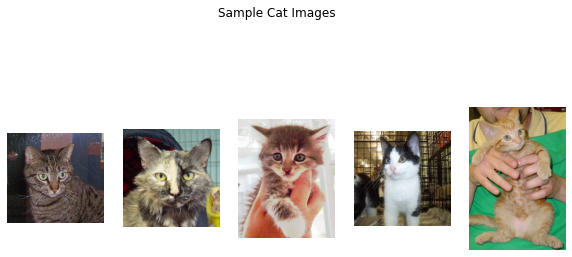

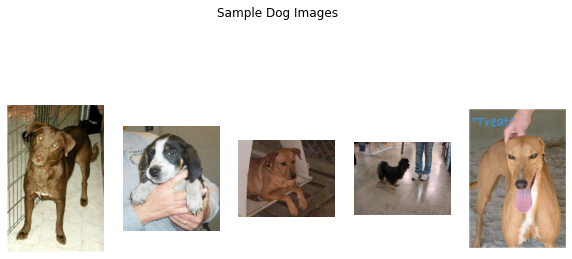

In [3]:
# Plot sample images
def plot_sample_images(images, title):
    plt.figure(figsize=(10, 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_sample_images(cat_images, "Sample Cat Images")
plot_sample_images(dog_images, "Sample Dog Images")

### Checking if we have the equal amount and sufficient images of Cats and Dogs

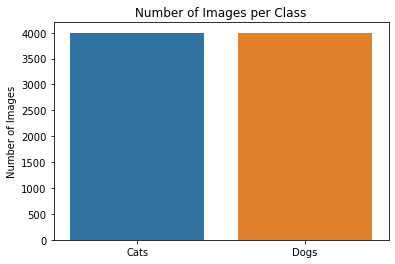

In [4]:
# Count the number of images for each class
num_cat_images = len([f for f in os.listdir(cat_path) if f.startswith('cat')])
num_dog_images = len([f for f in os.listdir(dog_path) if f.startswith('dog')])

# Plot the number of images for each class
sns.barplot(x=['Cats', 'Dogs'], y=[num_cat_images, num_dog_images])
plt.title('Number of Images per Class')
plt.ylabel('Number of Images')
plt.show()

### Checking if we have the equal amount and sufficient images of Cats and Dogs

In [5]:
def get_image_shapes(folder_path, label):
    files = [f for f in os.listdir(folder_path) if f.startswith(label)]
    shapes = [Image.open(os.path.join(folder_path, file)).size for file in files]
    return shapes

cat_shapes = get_image_shapes(cat_path,'cat')
dog_shapes = get_image_shapes(dog_path,'dog')

all_shapes = cat_shapes + dog_shapes
cat_widths, cat_heights = zip(*cat_shapes)
dog_widths, dog_heights = zip(*dog_shapes)
all_widths, all_heights = zip(*all_shapes)

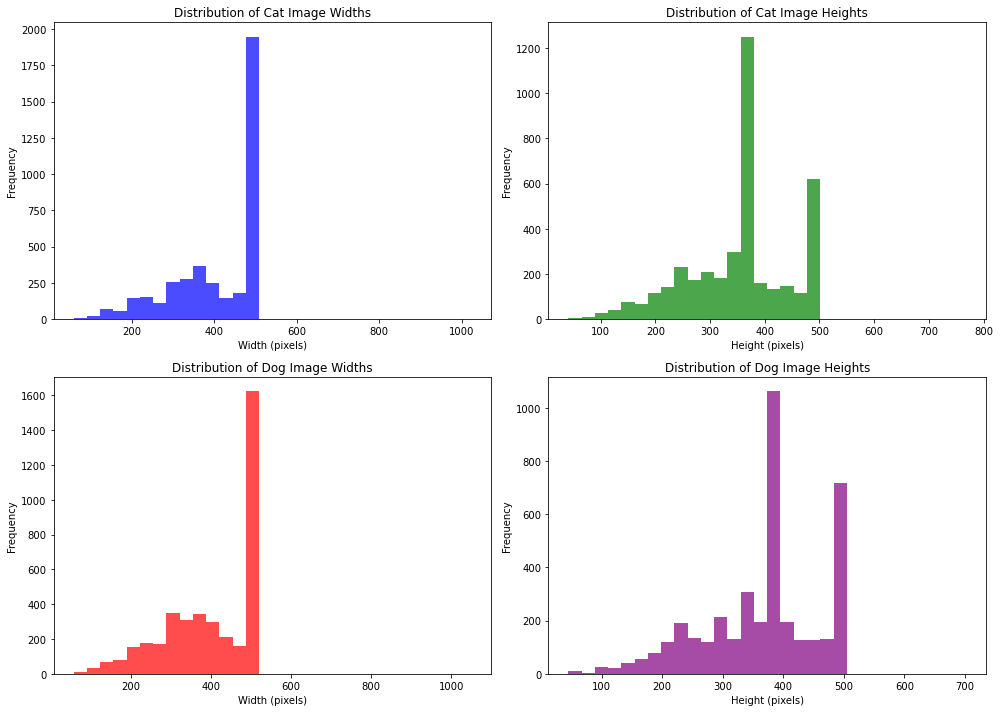

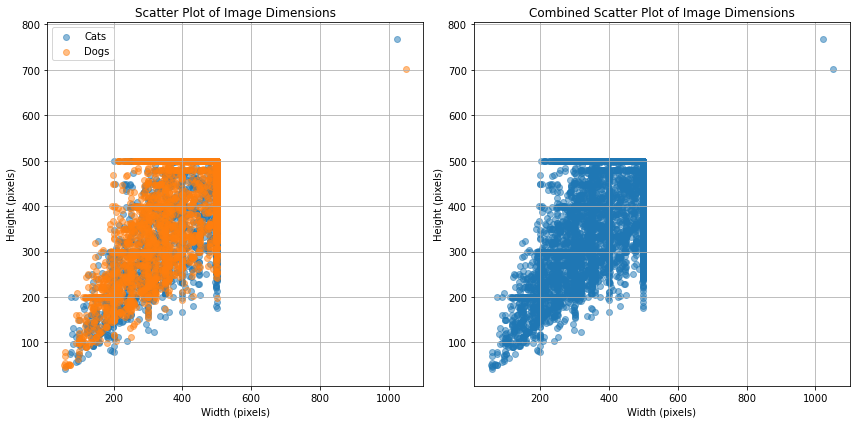

In [6]:
# Plot histograms of image widths and heights for cats and dogs
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(cat_widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Cat Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(cat_heights, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Cat Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dog_widths, bins=30, color='red', alpha=0.7)
plt.title('Distribution of Dog Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dog_heights, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Dog Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot of image dimensions for cats and dogs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(cat_widths, cat_heights, alpha=0.5, label='Cats')
plt.scatter(dog_widths, dog_heights, alpha=0.5, label='Dogs')
plt.title('Scatter Plot of Image Dimensions')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend()
plt.grid(True)

# Combined scatter plot of image dimensions
plt.subplot(1, 2, 2)
plt.scatter(all_widths, all_heights, alpha=0.5)
plt.title('Combined Scatter Plot of Image Dimensions')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

The provided data needs preprocessing because the images have varying aspect ratios. The benefits of preprocessing these images are as follows:

**1.Consistent Input Size:** Convolutional Neural Networks (CNNs) require all input images to have the same size, as the architecture has a fixed input dimension. Therefore, all images fed into the CNN must be resized to a uniform width and height.

**2. Improved Performance and Reduced Memory Usage:** Resizing images to a smaller, consistent size can significantly lower the computational load and memory usage. This is particularly important when working with extensive datasets.

**3. Maintaining Aspect Ratio Consistency:** While resizing, it is often advantageous to retain the aspect ratio to prevent distortion. However, some level of distortion may be acceptable if it simplifies the preprocessing process.

### Preprocessing the Training set

Applying the transformation / image augmentation to aviod overfitting and increases diversity of training set

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,  #Rescale is feature scaling, since all pixels has to be within 0 and 255
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

training_set = train_datagen.flow_from_directory(
    'Dataset/training_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode='binary')   #Binary or categorical

Found 8000 images belonging to 2 classes.


### Preprocessing the Test Set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'Dataset/test_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [10]:
# Convolution layer

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

### Step 2 - Pooling

In [11]:
# Max Pool Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### 2nd Convolution Layer & Pooling

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flatening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test Set

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs=30)

Epoch 1/30
250/250 [==============================] - 54s 214ms/step - loss: 0.6768 - accuracy: 0.5691 - val_loss: 0.6867 - val_accuracy: 0.5645
Epoch 2/30
250/250 [==============================] - 49s 197ms/step - loss: 0.6160 - accuracy: 0.6640 - val_loss: 0.5798 - val_accuracy: 0.6860
Epoch 3/30
250/250 [==============================] - 52s 209ms/step - loss: 0.5492 - accuracy: 0.7160 - val_loss: 0.5258 - val_accuracy: 0.7465
Epoch 4/30
250/250 [==============================] - 49s 197ms/step - loss: 0.5173 - accuracy: 0.7424 - val_loss: 0.5099 - val_accuracy: 0.7510
Epoch 5/30
250/250 [==============================] - 48s 192ms/step - loss: 0.5025 - accuracy: 0.7523 - val_loss: 0.5233 - val_accuracy: 0.7480
Epoch 6/30
250/250 [==============================] - 47s 187ms/step - loss: 0.4774 - accuracy: 0.7651 - val_loss: 0.4713 - val_accuracy: 0.7720
Epoch 7/30
250/250 [==============================] - 46s 185ms/step - loss: 0.4594 - accuracy: 0.7786 - val_loss: 0.4905 - val_ac

## Part 4 - Making a single prediction

In [18]:
test_image = image.load_img('Dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
    predicition = 'dog'
else:
    predicition = 'cat'
    
print(predicition)

1/1 [==============================] - 0s 161ms/step
cat


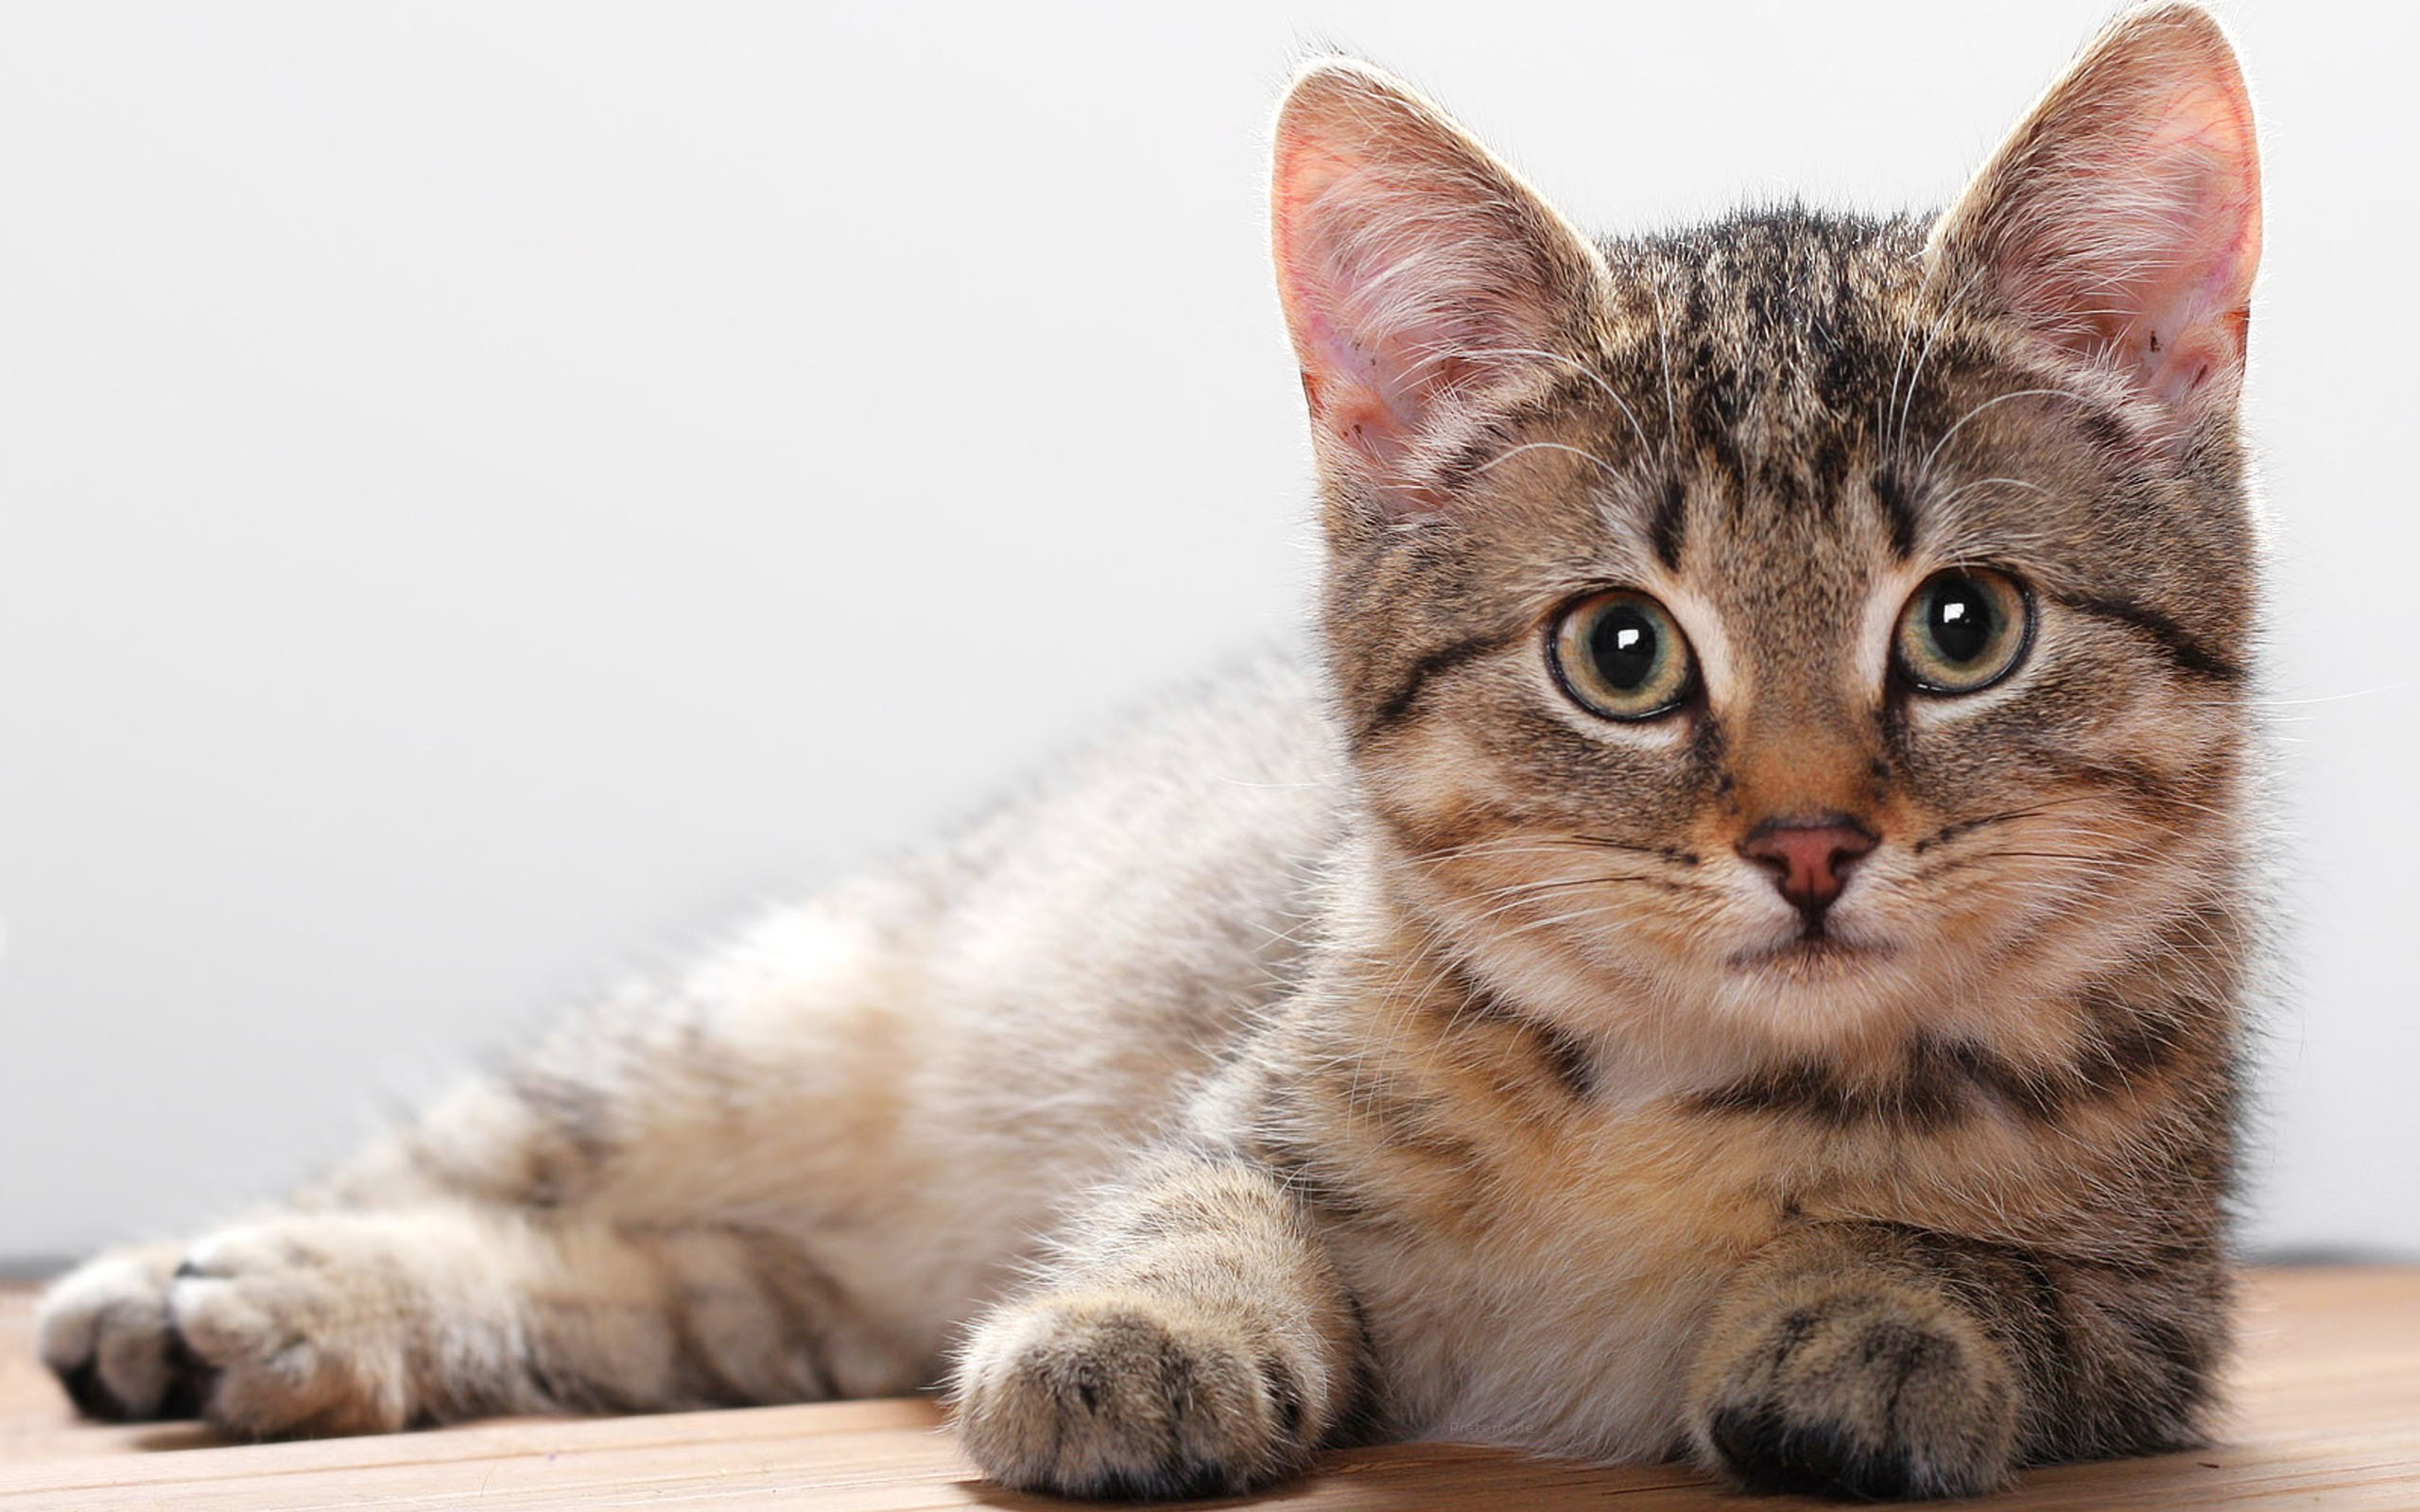

In [25]:
test_image = image.load_img('Dataset/single_prediction/cat_or_dog_2.jpg')